# Conociendo datos de pingüinos. 🗺🧭🐧

![Penguins](/work/ConociendoPinguinos/_47386ac6-86fe-4969-919b-180f7c956310.jpg)

## Instalar librerías necesarias

```
!pip install --upgrade pip
```
```
!pip install numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librerías

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

In [3]:
df= pd.read_csv('/work/ConociendoPinguinos/penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [4]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

+ **Species**: Especie a la que pertenece el pingüino 1 = "Adelie", 2 = "Gentoo", 3 = "Chinstrap".
+ **Island**: Isla en la que se encuentra el pingüino 1 = "Torgersen", 2 = "Biscoe", 3 = "Dream".
+ **Bill_length_mm**: Expresa la longitud del pico en milímetros.
+ **Bill_depth_mm**: Expresa la profundidad del pico en milímetros.
+ **Flipper_length_mm** : Expresa la longitud de la aleta en milímetros.
+ **Body_mass_g**: Expresa el peso del pingüino en gramos.
+ **Sex**: Sexo del pingüino.
+ **Year**: Año en el que se tomó la medición.



## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [5]:
df.dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [6]:
df.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [7]:
df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [8]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [9]:
df.isnull().sum().sum()

19

## ¿Cuál es la proporción de valores nulos por cada variable?

In [10]:
df.isnull().melt()

,variable,value
0,species,False
1,species,False
2,species,False
3,species,False
4,species,False
...,...,...
2747,year,False
2748,year,False
2749,year,False
2750,year,False


## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [11]:
df.shape

(344, 8)

In [12]:
processed_df=df.dropna()
processed_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [13]:
processed_df.shape

(333, 8)

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [14]:
processed_df.describe(include= 'all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Solo las numéricas

In [15]:
processed_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas


In [16]:
(
    processed_df
    .astype({
        'species':'category',
        'island':'category',
        'sex':'category'
    })
    .describe(include='category')
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


## ¿Cómo visualizar los conteos?

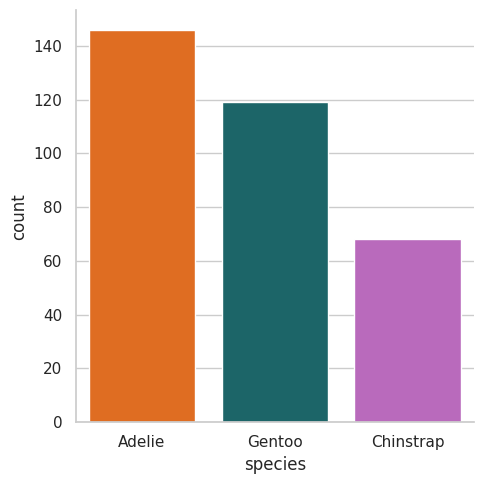

In [17]:
    sns.catplot(
    data=processed_df,
    x='species',
    kind='count',
    palette=penguin_color
)
plt.show()

# Medidas de tendencia central

## Media o promedio

In [18]:
processed_df.mean()

/tmp/ipykernel_2417/4180033776.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [19]:
processed_df.median()

/tmp/ipykernel_2417/344398970.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

## Moda

In [20]:
processed_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [21]:
processed_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [22]:
processed_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [23]:
processed_df.max(numeric_only=True)-processed_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [24]:
processed_df.std()

/tmp/ipykernel_2417/2574789624.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_df.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [25]:
processed_df.quantile(q=[0.25,0.50,0.75]).transpose().assign(iqr=lambda df:df[0.75]-df[0.25])

/tmp/ipykernel_2417/2162492882.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_df.quantile(q=[0.25,0.50,0.75]).transpose().assign(iqr=lambda df:df[0.75]-df[0.25])


,0.25,0.5,0.75,iqr
bill_length_mm,39.5,44.5,48.6,9.1
bill_depth_mm,15.6,17.3,18.7,3.1
flipper_length_mm,190.0,197.0,213.0,23.0
body_mass_g,3550.0,4050.0,4775.0,1225.0
year,2007.0,2008.0,2009.0,2.0


## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

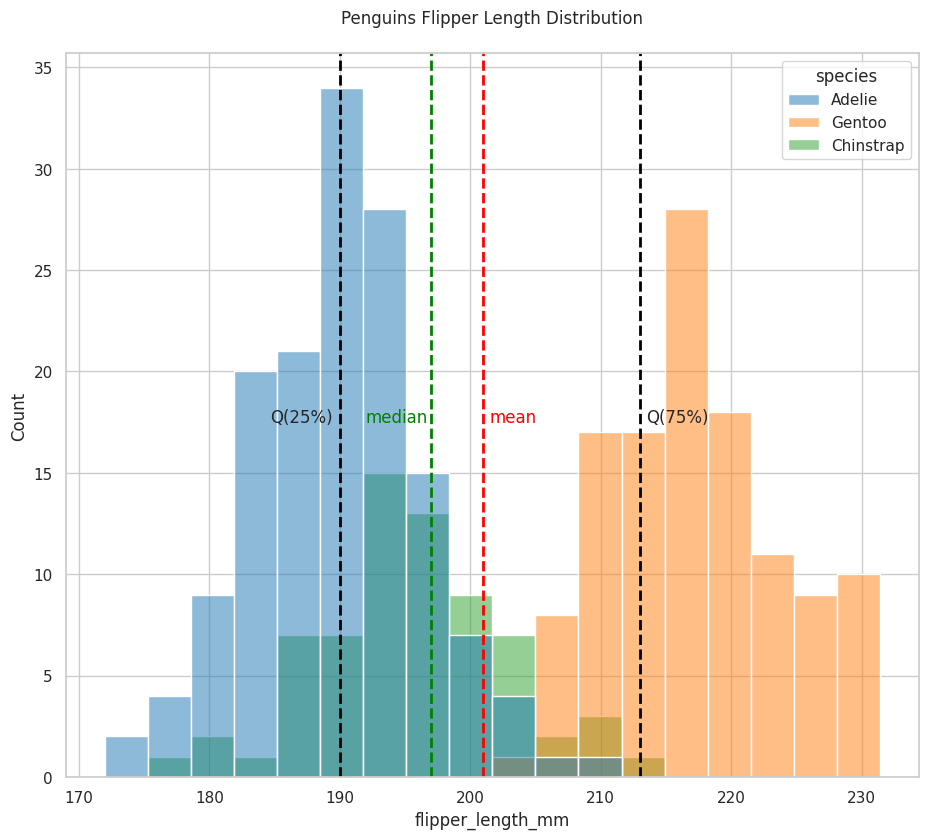

In [26]:
var_flipper_len = processed_df['flipper_length_mm']

g=sns.histplot(
    data=processed_df,
    x='flipper_length_mm',
    binwidth=3.3,
    hue='species',
    alpha=.5
)
g.set_title('Penguins Flipper Length Distribution', y=1.03)

# Mean(Red)
plt.axvline(
    x =var_flipper_len.mean(),
    linestyle="dashed",
    color="r",
    linewidth=2
)

# Median(Green)
plt.axvline(
    x=var_flipper_len.median(),
    linestyle="dashed",
    color="g",
    linewidth=2
)

# Q_75(Black)
plt.axvline(
    x=var_flipper_len.quantile(0.75),
    linestyle="dashed",
    color="k",
    linewidth=2
)

# Q_25(Black)
plt.axvline(
    x=var_flipper_len.quantile(0.25),
    linestyle="dashed",
    color="k",
    linewidth=2
)

plt.text(184.7,17.5, 'Q(25%)', fontsize=12)
plt.text(192,17.5, 'median', fontsize=12, color='g')
plt.text(201.5,17.5, 'mean', fontsize=12, color='r')
plt.text(213.5,17.5, 'Q(75%)', fontsize=12)

plt.show()

### Diagrama de caja / boxplot

<AxesSubplot: xlabel='flipper_length_mm', ylabel='species'>

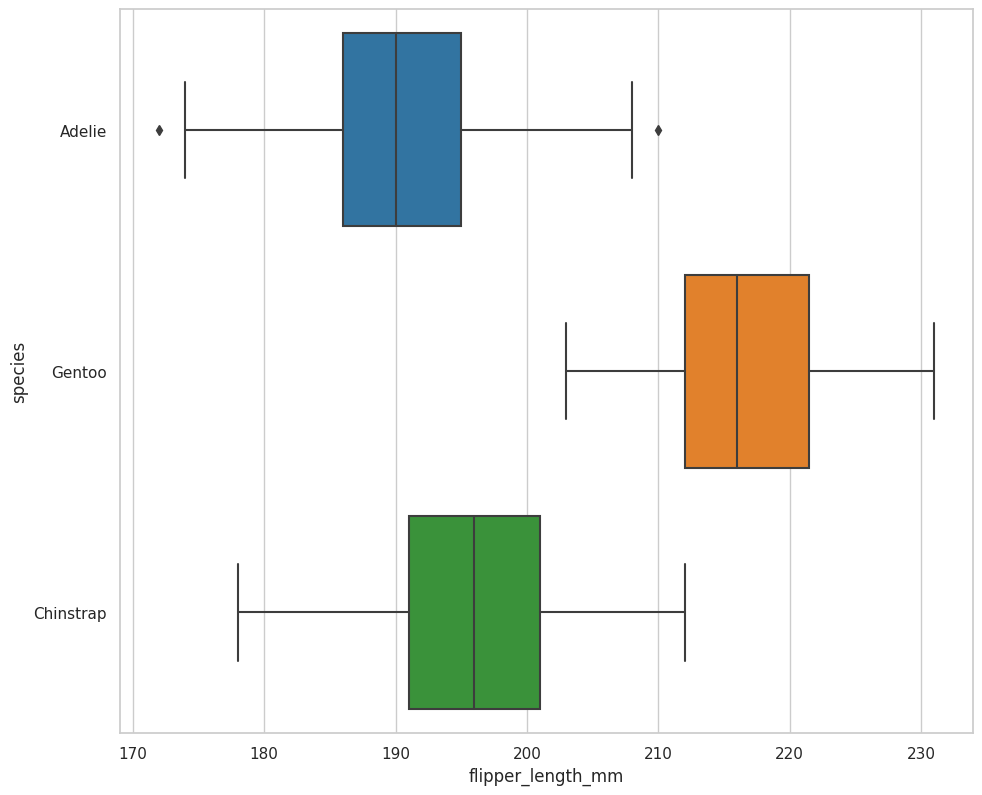

In [27]:
sns.boxplot(
    data=processed_df,
    x='flipper_length_mm',
    y='species'
) 

### Limitaciones

In [28]:
#Funcion para encontrar el bindwidth optimo.
def freedman_diaconis_bindwidth(x: pd.Series) -> float:

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

In [29]:
freedman_diaconis_bindwidth(processed_df)

/tmp/ipykernel_2417/2301083716.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  IQR = x.quantile(0.75) - x.quantile(0.25)


bill_length_mm         1.312885
bill_depth_mm          0.447246
flipper_length_mm      3.318280
body_mass_g          176.734504
year                   0.288546
dtype: float64

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

Esta función nos indica la probabilidad de que una variable aleatoria discreta tome un valor determinado. Vamos a usar de ejemplo la longitud de las aletas.

### Utilizando `empiricaldist`

In [30]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_df.flipper_length_mm,
    normalize=True
)

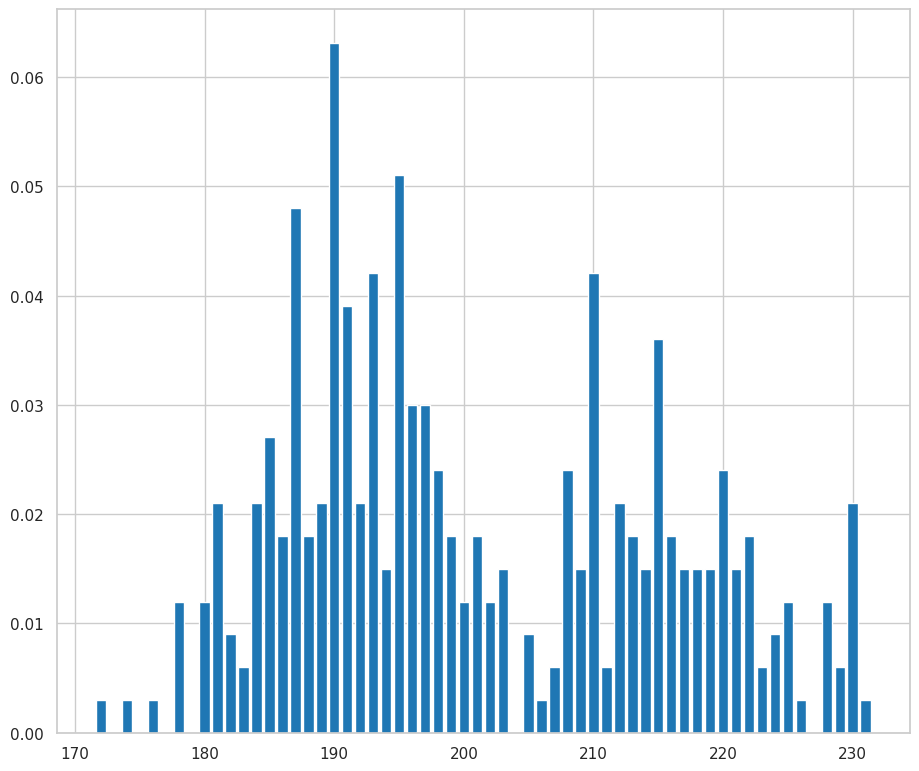

In [31]:
pmf_flipper_length_mm.bar()

## Funciones empirícas de probabilidad acumulada (ECDFs)

Devuelve la probabilidad de que una variable sea igual o menor que un valor determinado.  Vamos a usar de ejemplo la longitud de las aletas

### Utilizando `empiricaldist`

In [32]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_df.flipper_length_mm,
    normalize=True
)

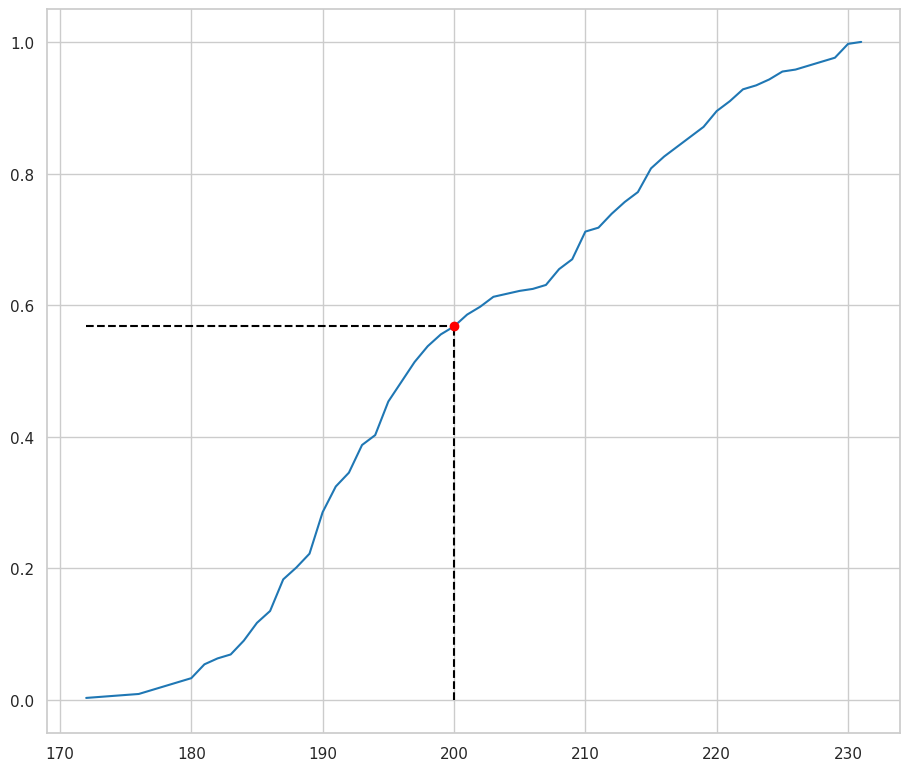

In [33]:
cdf_flipper_length_mm.plot()
q = 200
p = cdf_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')

### Comparando distribuciones

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

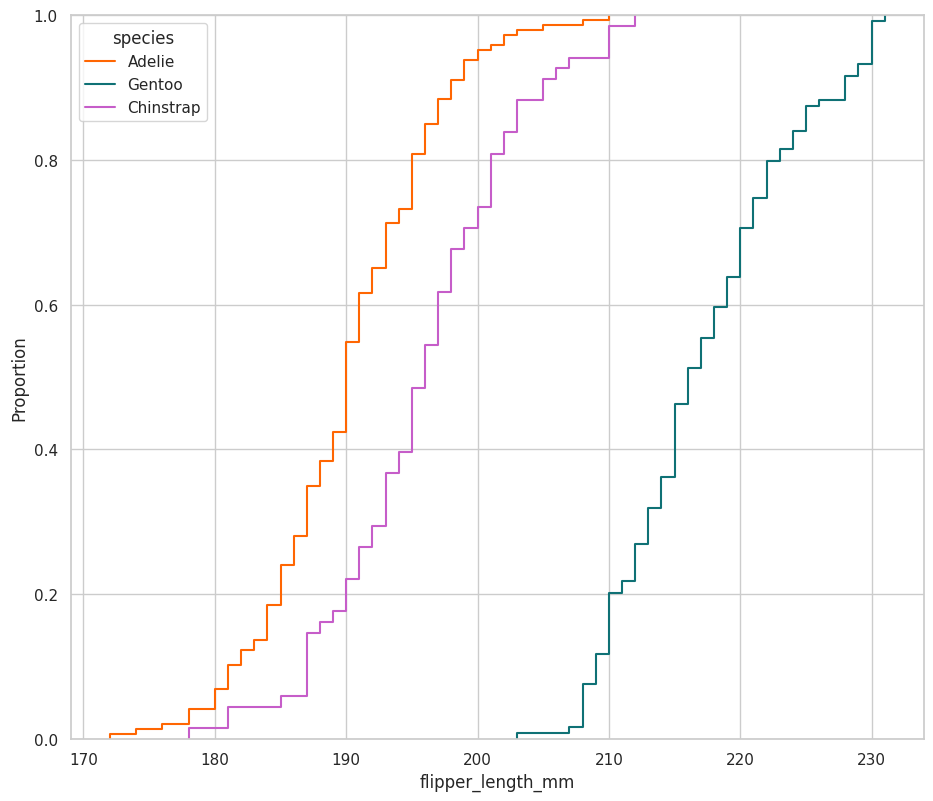

In [34]:
sns.ecdfplot(
    data=processed_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

Como conclusión, podemos decir que los Pingüinos Gentoo tiene las aletas mas grande.

## Funciones de densidad de probabilidad

Nos ayudan a estimar la probabilidad para valores que no contiene el dataset, formando una distribución continua. También son utiles para ver la forma de la distribucion a detalle y hacer comparaciones con la distribucion teorica.

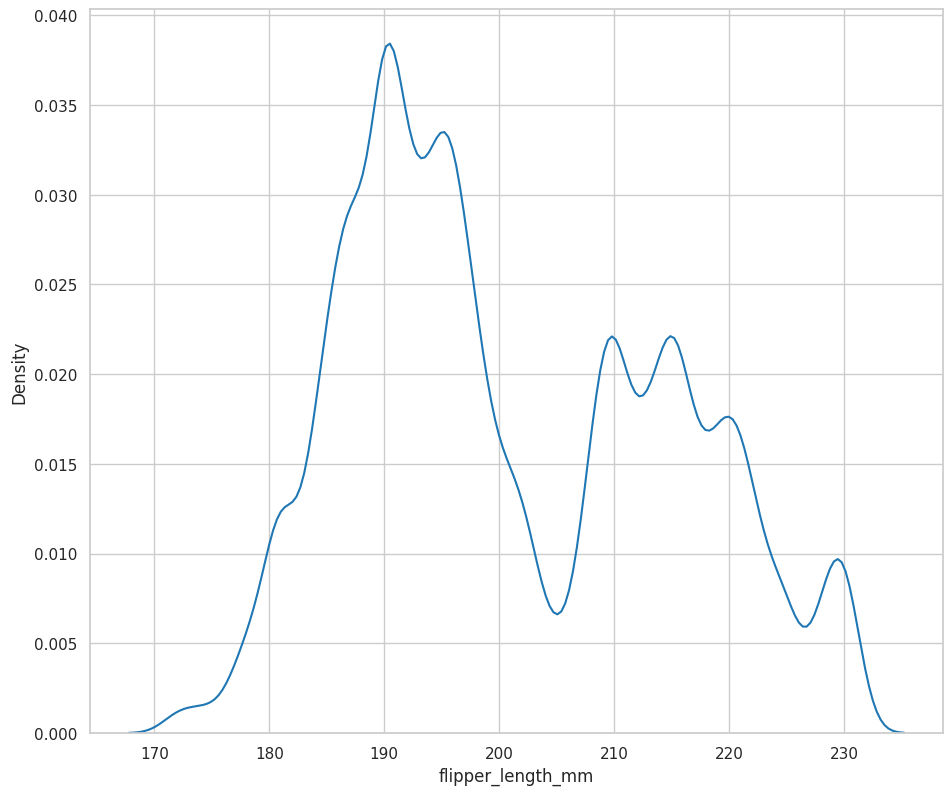

In [35]:
sns.kdeplot(
    data= processed_df,
    x='flipper_length_mm',
    bw_method=0.1
)
plt.show()

# Estableciendo relaciones:

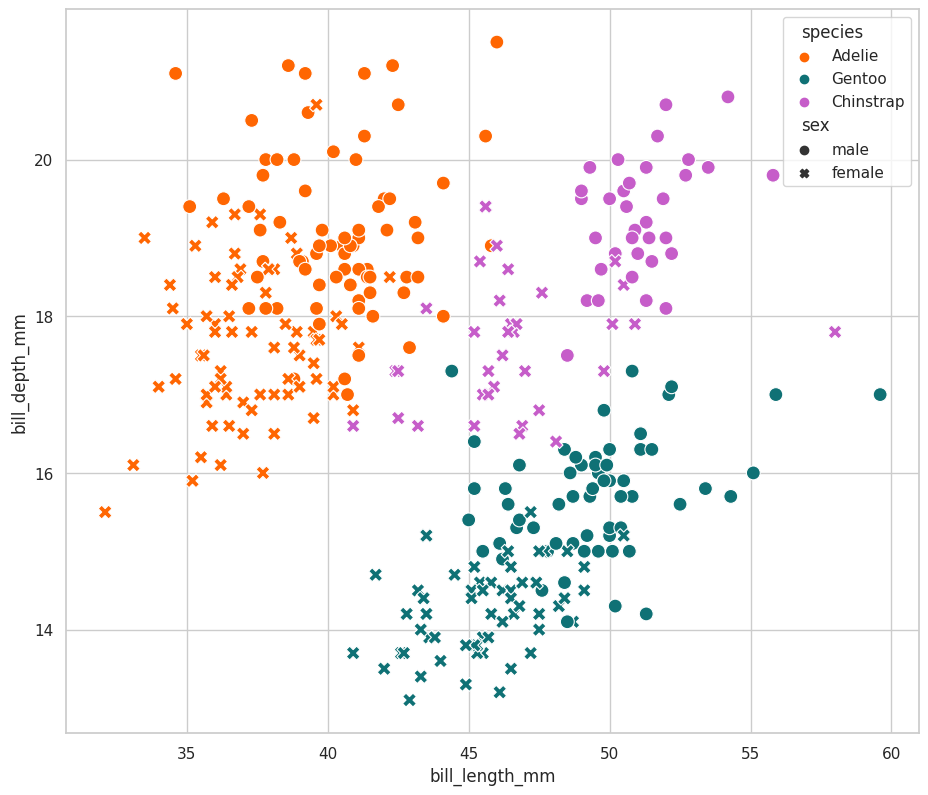

In [36]:
sns.scatterplot(
    data = processed_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    style='sex',
    hue= 'species',
    palette=penguin_color,
    s = 100
)
plt.show()

TypeError: The y variable is categorical, but one of ['numeric', 'datetime'] is required

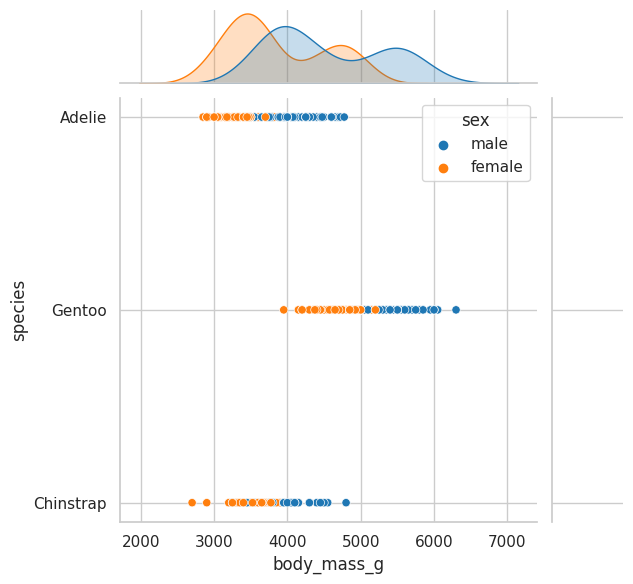

In [40]:
sns.jointplot(
    data=processed_df,
    x='body_mass_g',
    y='species',
    hue='sex'
)

/tmp/ipykernel_2417/4255579622.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


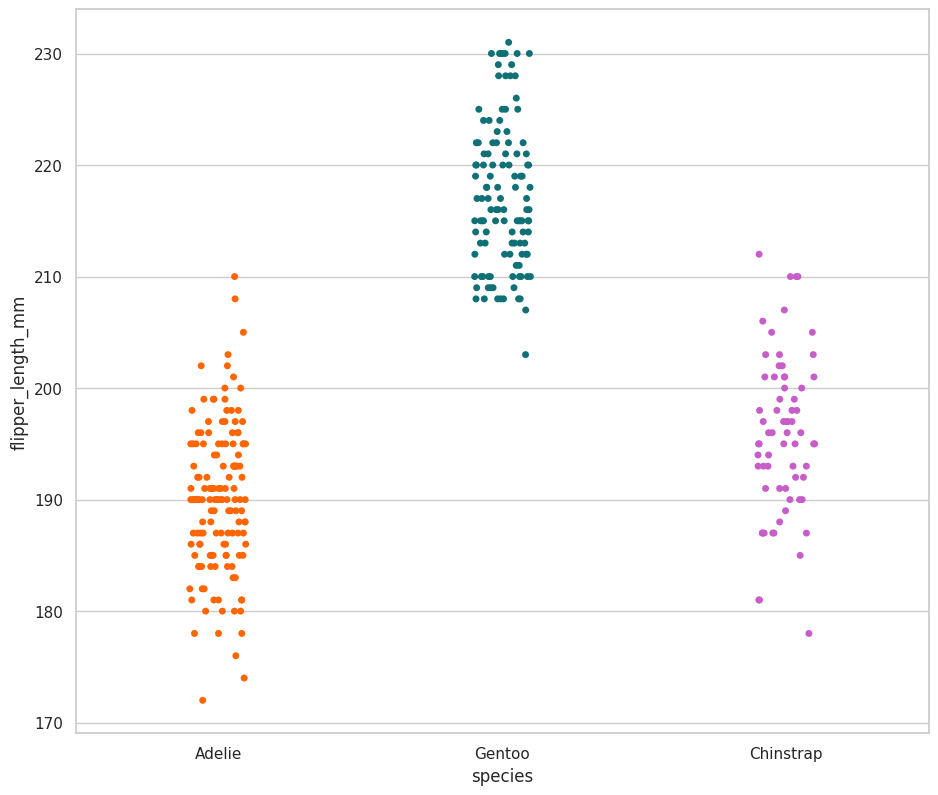

In [41]:
sns.stripplot(
    data=processed_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)
plt.show()

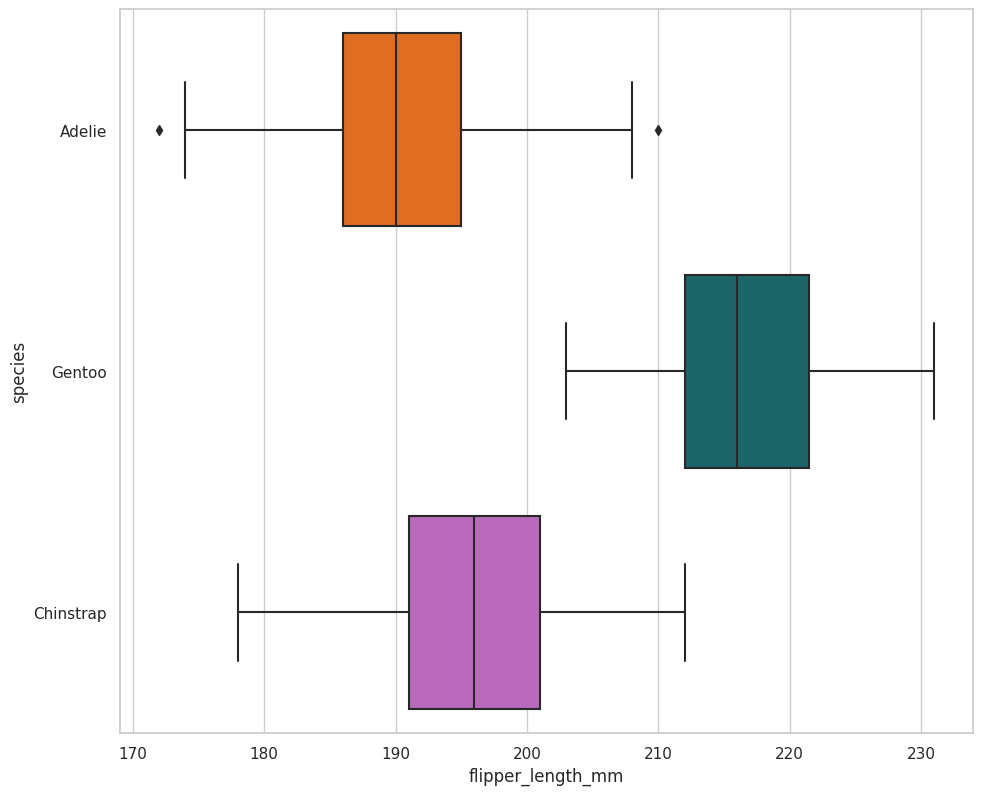

In [42]:
sns.boxplot(
    data=processed_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color
)
plt.show()

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [43]:
processed_df.corr()

/tmp/ipykernel_2417/3538369116.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_df.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


## ¿Cómo puedo visualizar los coeficientes de correlación?

/tmp/ipykernel_2417/1880369261.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=processed_df.corr(),


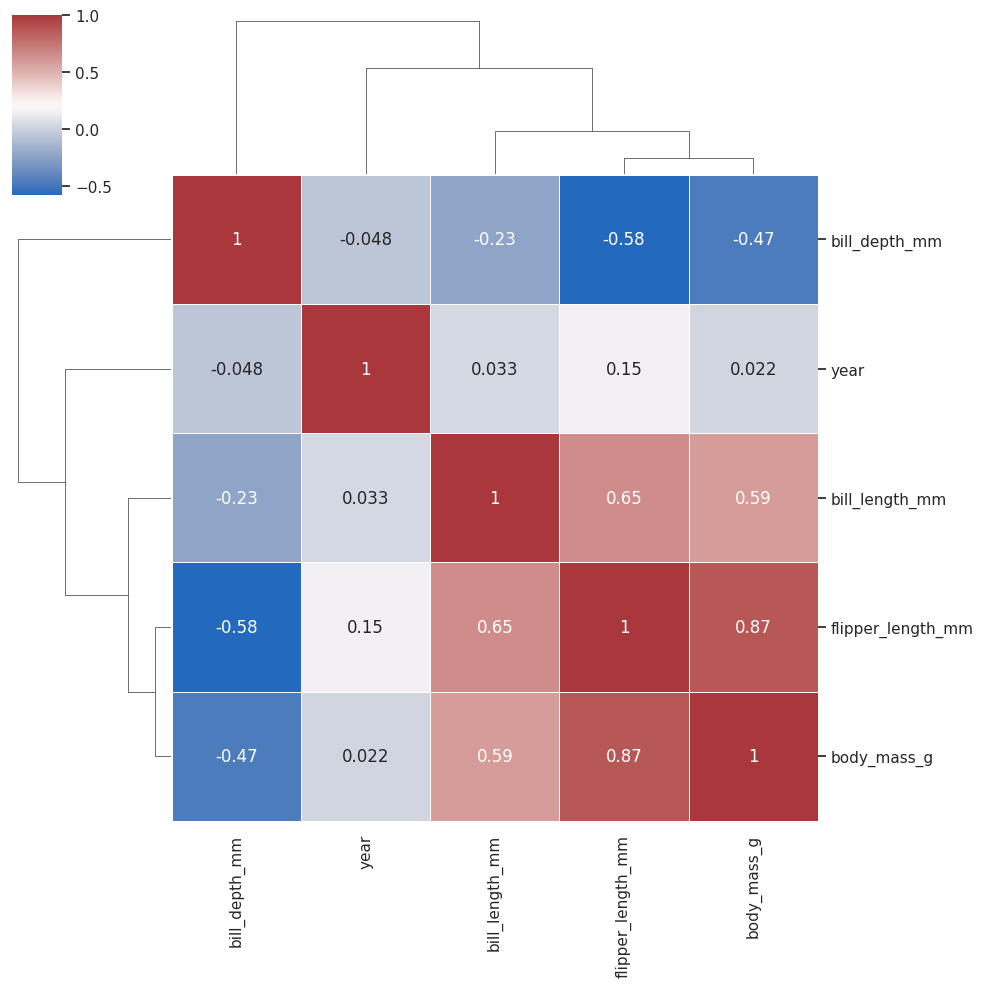

In [44]:
sns.clustermap(
    data=processed_df.corr(),
    cmap='vlag',
    linewidths=0.5,
    annot=True
)

Existe una correlación importante entre el peso y la longitud de las aletas y una correlación menos expresada entre el peso y la longitud del pico.

## ¿Cómo podría representar una variable categórica como númerica discreta?

In [45]:
processed_df= (
    processed_df.
    assign(
        numeric_sex=lambda df: df.sex.replace(['female','male'],[0,1])
    )
)
processed_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,numeric_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,1
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,1
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,1


# Estableciendo relaciones: Análisis de regresión simple

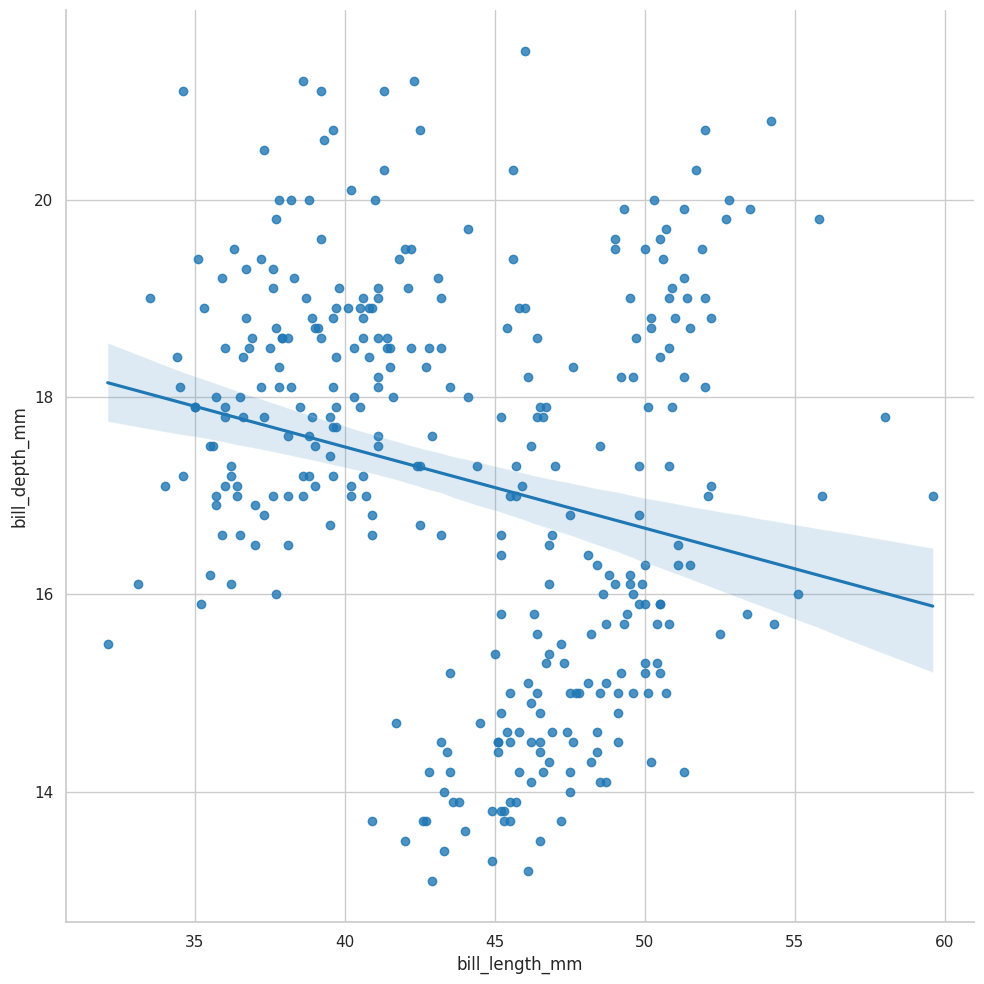

In [46]:
sns.lmplot(
    data=processed_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
)
plt.show()

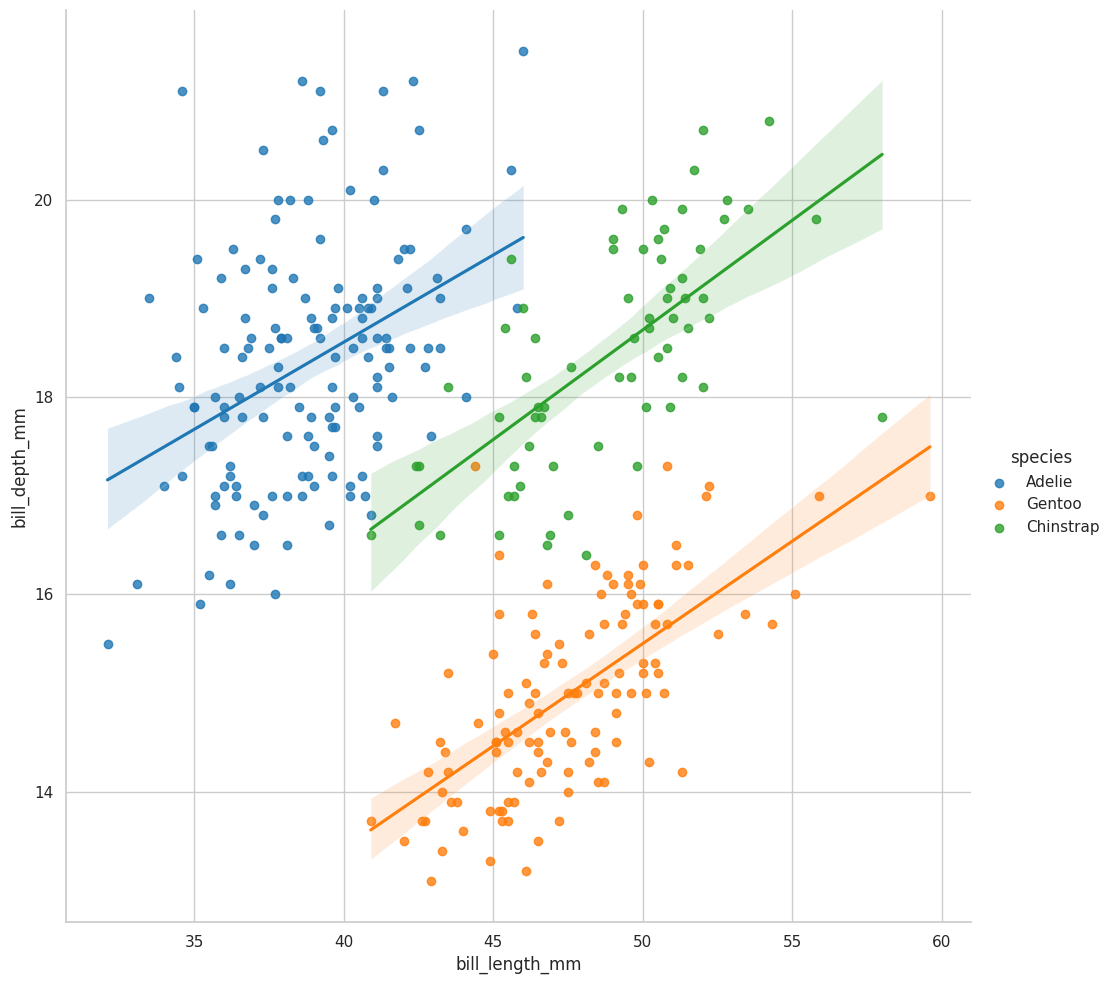

In [47]:
sns.lmplot(
    data=processed_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    hue='species'
)
plt.show()

En estos dos graficos vemos que existe una relacion directa entre el largo y profundidad del pico siempre que se diferencia la especie del pinguino.

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

**Dato a tener en cuenta**:El R-cuadrado es una medida de qué tan bien los datos se ajustan a una línea o curva de regresión. El R-cuadrado varía entre 0 y 1, donde 0 indica que el modelo no explica ninguna variabilidad en los datos y 1 indica que el modelo explica toda la variabilidad en los datos. 

### Creando modelos

#### Modelo 1

In [48]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=processed_df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           1.54e-32
Time:                        01:38:09   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 2

In [49]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm',
        data=processed_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          3.13e-105
Time:                        01:38:16   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 3

In [50]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + bill_length_mm',
        data=processed_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     530.4
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          8.15e-104
Time:                        01:38:22   Log-Likelihood:                -2460.6
No. Observations:                 333   AIC:                             4927.
Df Residuals:                     330   BIC:                             4939.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5836.2987    312.604    -18.670      0.000   -6451.246   -5221.352
flipper_length_mm    48.8897      2.034     24.034      0.000      44.888      52.891
bill_length_mm        4.9586      5.214      0.951      0.342      -5.297      15.214
==============================================================================
Omnibus:                        5.790   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.729
Skew:                           0.321   Prob(JB):                       0.0570
Kurtosis:                       3.031   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 4

In [51]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + bill_length_mm + C(sex)',
        data=processed_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     457.1
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          5.89e-117
Time:                        01:38:30   Log-Likelihood:                -2426.7
No. Observations:                 333   AIC:                             4861.
Df Residuals:                     329   BIC:                             4877.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5433.5336    286.558    -18.961      0.000   -5997.251   -4869.816
C(sex)[T.male]      358.6309     41.572      8.627      0.000     276.851     440.411
flipper_length_mm    48.2093      1.841     26.179      0.000      44.587      51.832
bill_length_mm       -5.2012      4.860     -1.070      0.285     -14.762       4.360
==============================================================================
Omnibus:                        0.549   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.664
Skew:                           0.081   Prob(JB):                        0.718
Kurtosis:                       2.852   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 5

In [52]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data=processed_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          3.53e-118
Time:                        01:38:35   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Despues de haber creado 5 modelos de regresion para calcular el peso del pinguino sin tener bascula, podriamos concluir que teniendo la medidas de las aletas y el sexo podriamos determinar el peso con el modelo 5.
Se descarta el modelo 4,aunque dé como resultado un r2 igual al modelo 5, ya que cuenta con una variable más y el resultado es el mismo.

### Visualizando resultados

#### Creación de tabla de resultados

In [53]:
models_result = pd.DataFrame(
    dict(
        actual_value =processed_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species=processed_df.species,
        sex=processed_df.sex
    )
)

models_result 

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3205.648453,3206.616788,3447.612119,3441.323750,Adelie,male
1,3800.0,3817.119665,3456.414782,3453.048687,3327.947231,3328.384372,Adelie,female
2,3250.0,3886.553073,3907.794176,3897.022794,3757.669922,3751.223949,Adelie,female
4,3450.0,3574.102738,3807.487644,3781.392446,3679.975733,3657.259599,Adelie,female
5,3650.0,3799.761313,3657.027846,3647.615734,3880.455544,3864.163327,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.0,5231.825347,4509.633367,4560.557415,4614.193398,4662.860306,Chinstrap,male
340,3400.0,4164.286703,4258.867037,4255.118161,4078.491083,4080.099176,Chinstrap,female
341,3775.0,4693.716437,3807.487644,3845.358402,3971.510831,4005.109853,Chinstrap,male
342,4100.0,4797.866549,4660.093165,4682.433484,4784.827406,4803.806832,Chinstrap,male


#### ECDFs

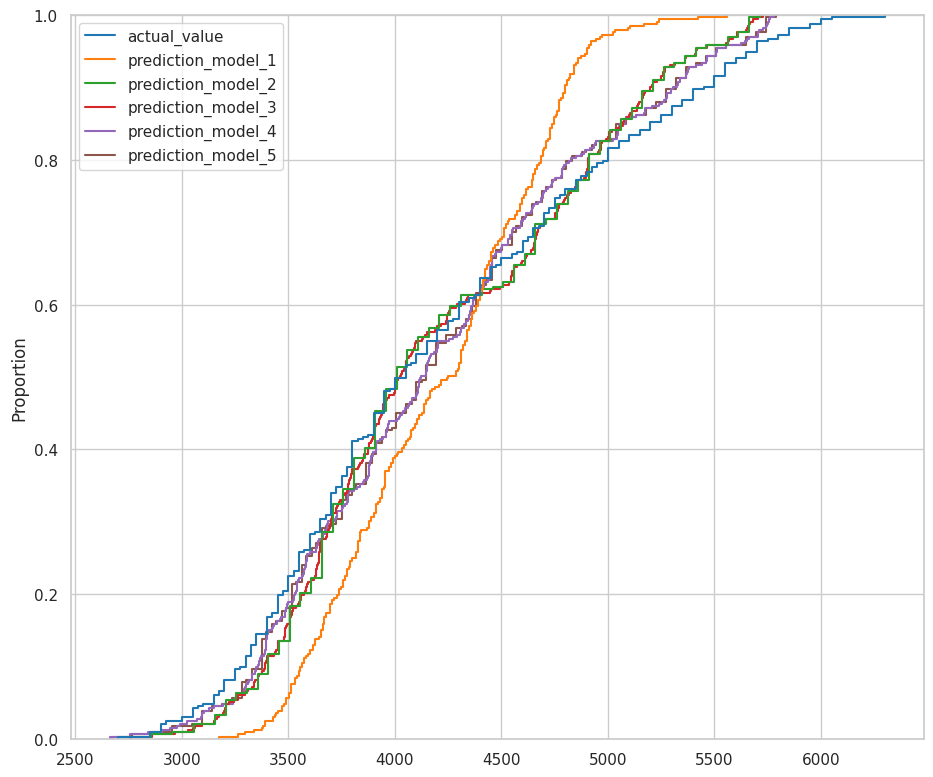

In [54]:
sns.ecdfplot(
    data=models_result.select_columns(['actual_value','prediction_model_1','prediction_model_2','prediction_model_3','prediction_model_4','prediction_model_5'])
)
plt.show()

#### PDFs

Se grafica el modelo elegido.

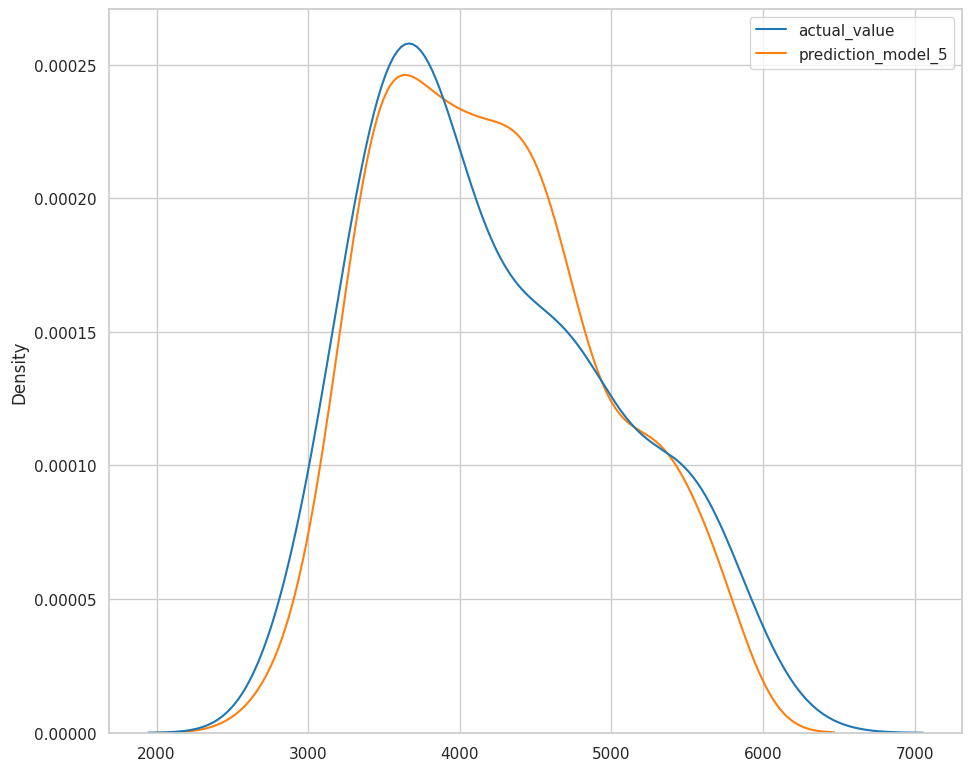

In [55]:
sns.kdeplot(
    data=models_result.select_columns(['actual_value','prediction_model_5'])
)
plt.show()

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

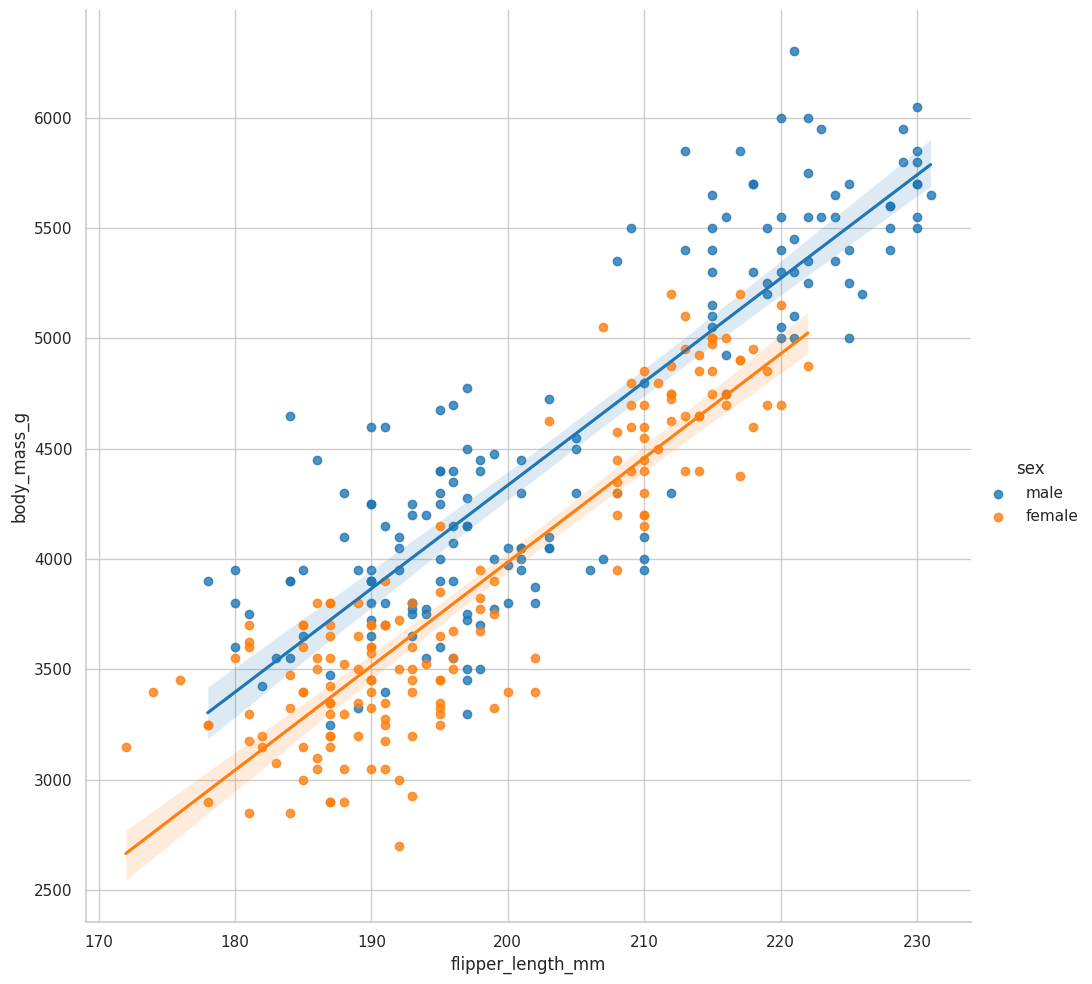

In [56]:
sns.lmplot(
    data=processed_df,
    x='flipper_length_mm',
    y='body_mass_g',
    height=10,
    hue='sex'
)
plt.show()

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

In [57]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=processed_df 
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Sun, 02 Apr 2023   Pseudo R-squ.:                  0.4793
Time:                        01:39:10   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

## Exploración de nuestras variables categóricas

In [59]:
(
    processed_df
    .value_counts(['island','sex'])
    .reset_index(name='count')
)

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

In [0]:
processed_df.species.unique()

In [0]:
processed_df=(
    processed_df
    .assign(is_adelie= lambda df: df.species.replace(['Adelie','Gentoo','Chinstrap'],[1,0,0]))
)

In [0]:
model_is_adelie = smf.logit(
    formula= 'is_adelie ~ flipper_length_mm + C(sex)',
    data= processed_df
).fit()

model_is_adelie.params

In [0]:
is_adelie_predic = pd.DataFrame(
    dict(
        actual_adelie = processed_df.is_adelie,
        predicted_values = model_is_adelie.predict().round()
    )
)
is_adelie_predic

In [0]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_predic.actual_adelie,
        is_adelie_predic.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_predic.actual_adelie,
    is_adelie_predic.predicted_values
)

## Información de sesión

In [60]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52fd7748-0234-480a-9dff-0bb6e3464c7a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>